[(0.0, 0.0), (0.0, 9995.00000000000), (9000.00000000000, 0.0)]


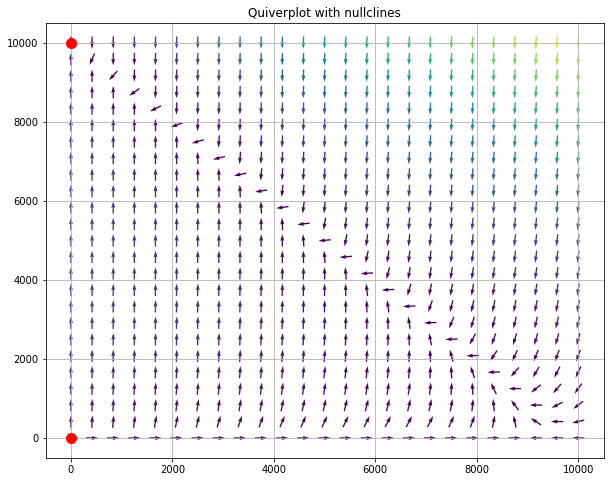

In [54]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

# define the system in this way (asuming a predator-prey-system with no negative values)
# to avoid interference x = r (for resource) and y = c (for consumer)
k = 10000
r1 = 0.1
r2 = 2

x, y = sm.symbols('x, y', negative=False)
X = r1*x*(k-x-y)/k - 0.01*x
Y = r2*y*(k-x-y)/k - 0.001*y

# use sympy's way of setting equations to zero
XEqual = sm.Eq(X, 0)
YEqual = sm.Eq(Y, 0)

# compute fixed points
equilibria = sm.solve( (XEqual, YEqual), x, y )
print(equilibria)

# define the system in numpy arrays
def Sys(X, t=0):
    k = 10000
    # here X[0] = x and x[1] = y    
    return np.array([ r1*X[0]*(k - X[0] -X[1])/k - 0.01*X[0], r2*X[1]*(k - X[0] -X[1])/k - 0.001*X[1] ])

# quiver plot
fig2 = plt.figure(figsize=(10,8))
ax4 = fig2.add_subplot(1,1,1)

x = np.arange(0,k*1.5)
y = np.arange(0,k*1.5)

# plot nullclines
# ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline')
# ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

fp = equilibria[:-1]
# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Quiverplot with nullclines")
# ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(0, k, 25)
y = np.linspace(0, k, 25)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
# ax4.legend()
ax4.grid()

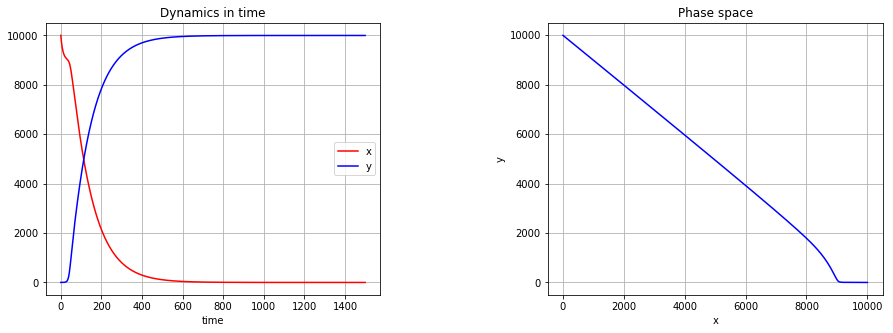

In [55]:
from scipy import integrate

# generate 1000 linearly spaced numbers for x-axes
t = np.arange(0, 1500)
# initial values: x0 = k, y0 = 1
Sys0 = np.array([k, 1])

# # define the system in numpy arrays
# def Sys(X, t=0):
#     k = 10000
#     # here X[0] = x and x[1] = y    
#     return np.array([ r1*X[0]*(k - X[0] -X[1])/k , r2*X[1]*(k - X[0] -X[1])/k ])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
I, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = I.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='x')
ax1.plot(y, 'b-', label='y')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, 'b-')
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()